In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('Concrete_UCI_.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
regressor=XGBRegressor()
regressor.fit(X_train,y_train)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9654810979791024

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(regressor, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

In [ ]:
scores.mean()

np.float64(-0.8908206762223015)

In [ ]:
importances = regressor.feature_importances_
feature_names = dataset.columns[:-1]

In [ ]:
df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df = df.reindex(df['Importance'].sort_values(ascending=True).index)

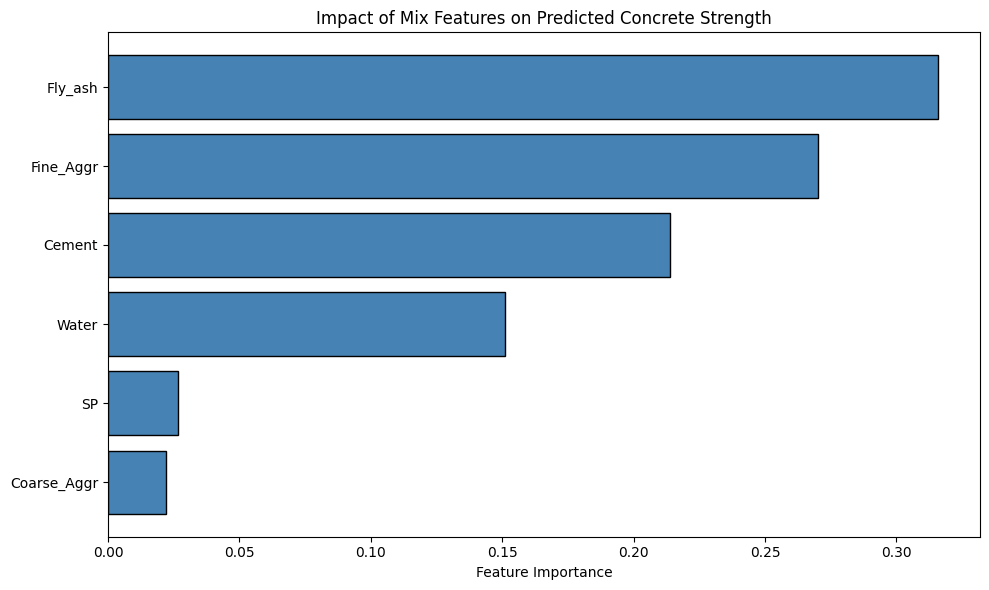

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df['Feature'], df['Importance'], color='steelblue', edgecolor='black')
plt.xlabel('Feature Importance')
plt.title('Impact of Mix Features on Predicted Concrete Strength')
plt.tight_layout()
plt.show()